In [379]:
import plots
import prepare_data
import voronoi_analysis
import numpy as np
import matplotlib.pyplot as plt

In [420]:
import importlib
importlib.reload(voronoi_analysis)
#importlib.reload(plots)

<module 'voronoi_analysis' from 'c:\\Users\\Magda\\Documents\\GitHub\\solution_pipes_patterns\\voronoi_analysis.py'>

In [43]:
rows, cols = 10, 10  
spacing = 1.0  # Distance between points

# Generate hexagonal grid
hex_points = prepare_data.generate_hexagonal_grid(rows, cols, spacing)

# Save to .dat file
np.savetxt("data/hexagonal_points.dat", hex_points, fmt="%.6f", delimiter=" ")

In [446]:
data_path="new_data/hexagonal_points.dat"
data_path_random="new_data/random_hexagonal_points.dat"

In [447]:
import importlib
importlib.reload(voronoi_analysis)
#importlib.reload(plots)
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


In [392]:
x_min, x_max = df["Center x coordinate"].min(), df["Center x coordinate"].max()
y_min, y_max = df["Center y coordinate"].min(), df["Center y coordinate"].max()

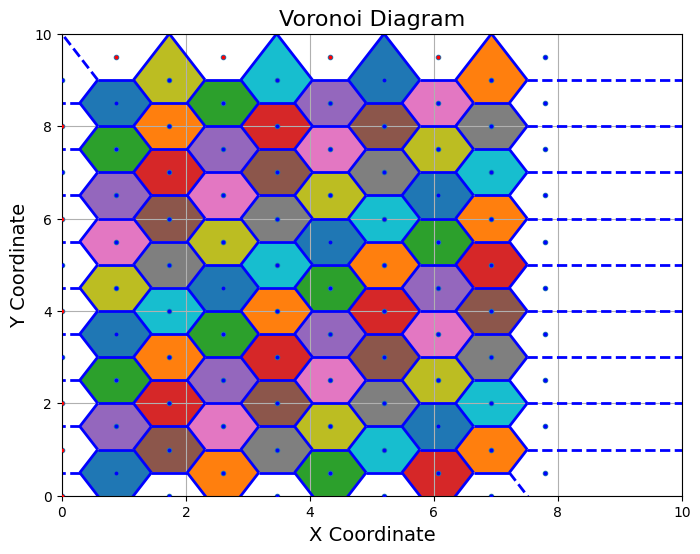

In [17]:
voronoi_plotter.all_voronoi_diagram_area_filtered(x_lim_min=0, x_lim_max=10, y_lim_min=0, y_lim_max=10)

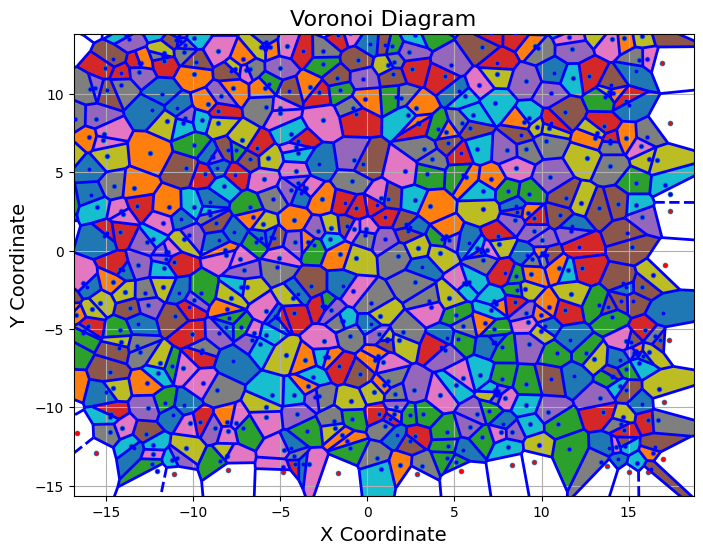

In [393]:
voronoi_plotter_random.all_voronoi_diagram_area_filtered(x_lim_min=x_min, x_lim_max=x_max, y_lim_min=y_min, y_lim_max=y_max)

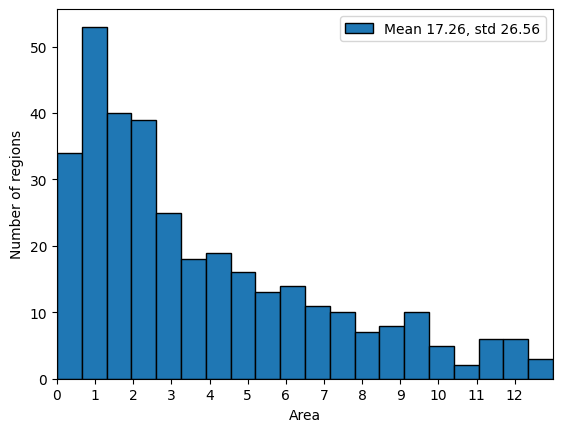

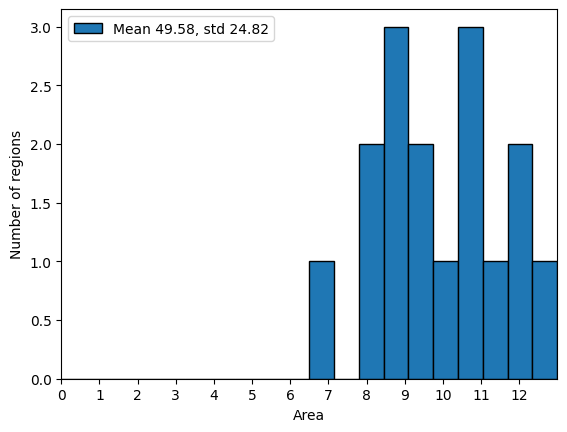

In [8]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

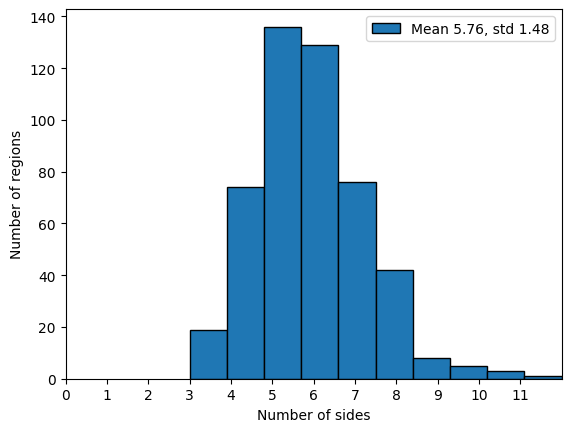

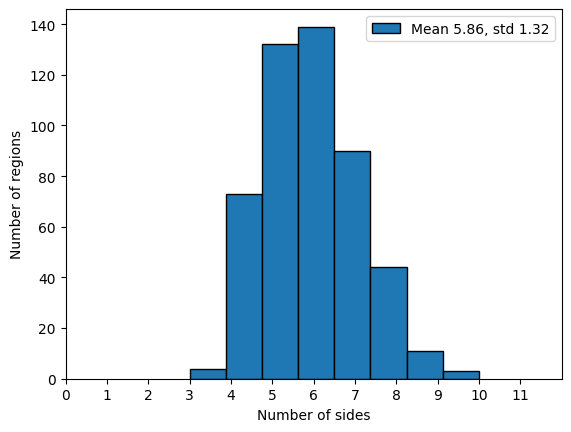

In [9]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

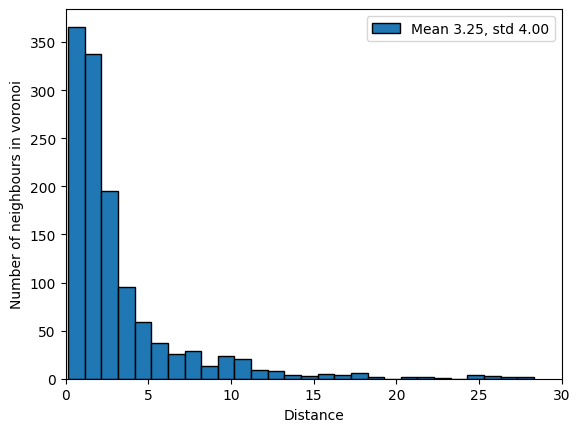

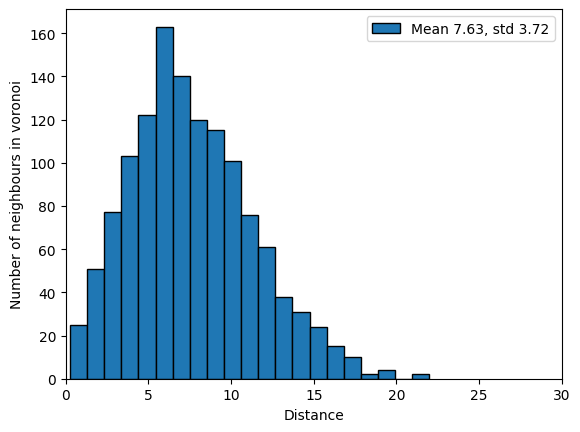

In [10]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

(-0.9999999976766296+7.347909173477385e-17j)
(-0.9999999976766296+7.347909173477385e-17j)
(-0.9999999976766296+7.347909173477385e-17j)
(-0.9999999976766296+7.347909173477385e-17j)
(-0.9999999980638581+0j)
(-0.9999999980638581-2.364882772181281e-22j)
(-0.9999999980638581+0j)
(-0.9999999980638581-2.364882772181281e-22j)
(-0.9999999980638581+0j)
(-0.9999999980638581-2.364882772181281e-22j)
(-0.9999999980638581+0j)
(-0.9999999980638581-2.364882772181281e-22j)
(-0.9999999980638581-2.4952428032295955e-21j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581+0j)
(-0.9999999980638581-2.2587545260114674e-21j)
(-0.9999999980638581+4.517509052022935e-21j)
(-0.714285712626164+2.0270423761553836e-22j)
(-0.9847402513099595+0.06966866139309971j)
(-0.714285712626164-1.0496992834543931e-16j)
(-0.9999999980638581+0j)
(-0.9999999980638579+2.364882772181281e-22j)
(-0.9999999980638581+0j)


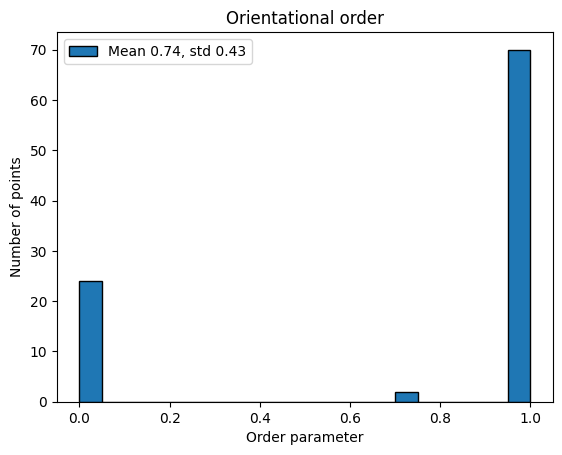

In [440]:
updated_df = voronoi_analyser.calculate_orientational_order(absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

1      1.000000
2      1.000000
3      1.000000
4      1.000000
5      1.000000
         ...   
94     1.000000
96     1.000000
98     1.000000
99     1.000000
100    0.230788
Name: Hexatic order, Length: 96, dtype: float64


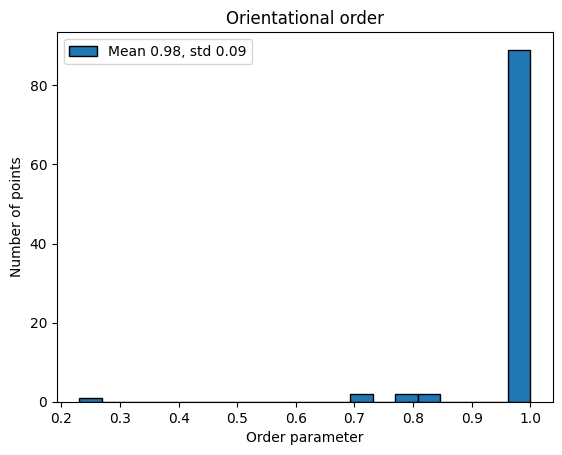

In [448]:
radius = 1.5
updated_df = voronoi_analyser.calculate_orientational_order_circles(radius, absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

In [411]:
updated_df

,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,0.237,-14.567,8.208,1.0,1.532,560.0,0.167858
1,0.159,-14.085,7.788,1.0,0.367,627.0,0.155196
2,0.145,-13.834,7.397,1.0,0.451,628.0,0.251607
3,0.187,-14.157,7.315,0.0,61.434,388.0,0.224840
4,0.169,-13.452,7.798,1.0,0.353,630.0,0.087848
...,...,...,...,...,...,...,...
644,0.181,7.318,-8.751,1.0,0.977,426.0,0.088481
645,0.203,7.790,-8.227,1.0,0.375,425.0,0.197184
646,0.180,6.083,-7.736,1.0,0.774,620.0,0.046381
647,0.207,3.583,-3.200,1.0,1.444,81.0,0.179389


(0.006928855278054526+0.1404160005585685j)
(0.02879615806028975-0.08206610826982572j)
(-0.5935626005596973-0.30712733597991787j)
(0.0077995289910183785+0.2613825864023179j)
(0.0063240811550985265+0.5020793967456587j)
(0.2661022456687518+0.06578467543322096j)
(-0.1717008043382631+0.25939270790255886j)
(0.16413717246005144+0.08063269378641191j)
(-0.008169249833313203-0.18094827363305516j)
(-0.08253422743731989-0.1253780757022351j)
(0.6181761718763111+0.1322250269356398j)
(0.13855093875644736+0.5929129027449852j)
(-0.1426441418889827-0.02996075402414681j)
(0.6865879048811376-0.24056431941582615j)
(0.08750867399256057+0.02346751731863613j)
(0.2450855348251452+0.34523176348103424j)
(-0.23379454213215567+0.41112138914990376j)
(0.048319554968543524+0.07997749107050682j)
(-0.01337240819020581-0.09104678739965831j)
(0.3212618564667571+0.7501256107611134j)
(0.10726364079912017-0.27502962531912784j)
(-0.35302057373678236+0.13996149848000902j)
(-0.05421987140303472+0.7360528570554351j)
(-0.2351362

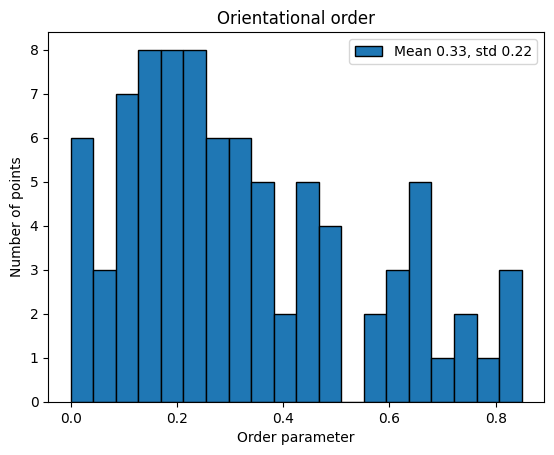

In [449]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order(absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

0     0.282445
1     0.254908
2     0.600462
3     0.533253
4     0.065398
        ...   
93    0.492367
94    0.457304
95    0.139074
97    0.167641
98    0.289557
Name: Hexatic order, Length: 85, dtype: float64


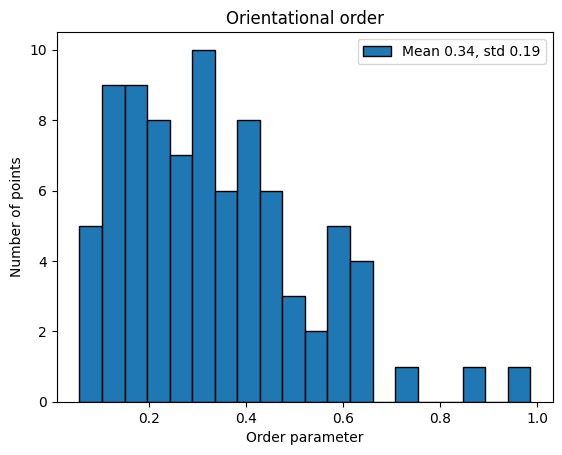

In [450]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order_circles(radius = 1.5,absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

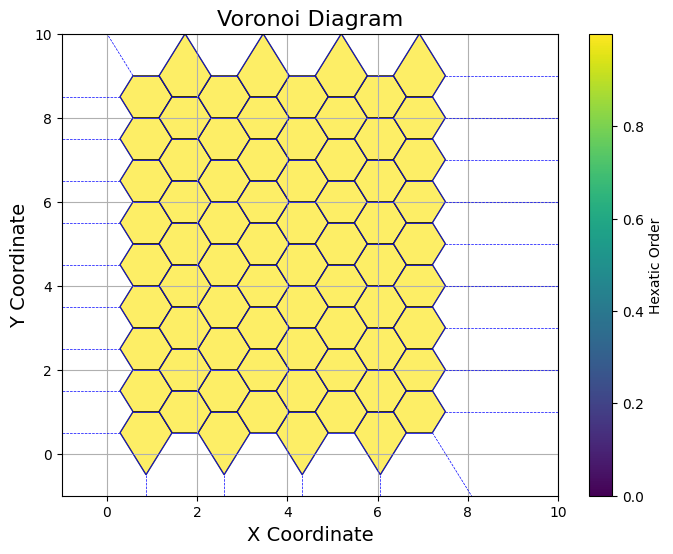

In [29]:
voronoi_plotter.hexatic_order(order, x_lim_min=-1, x_lim_max=10, y_lim_min=-1, y_lim_max=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Magda\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 3

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Magda\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Magda\AppData\Local\Temp\ipykernel_21272\1829818290.py", line 1, in <module>
    voronoi_plotter_random.h

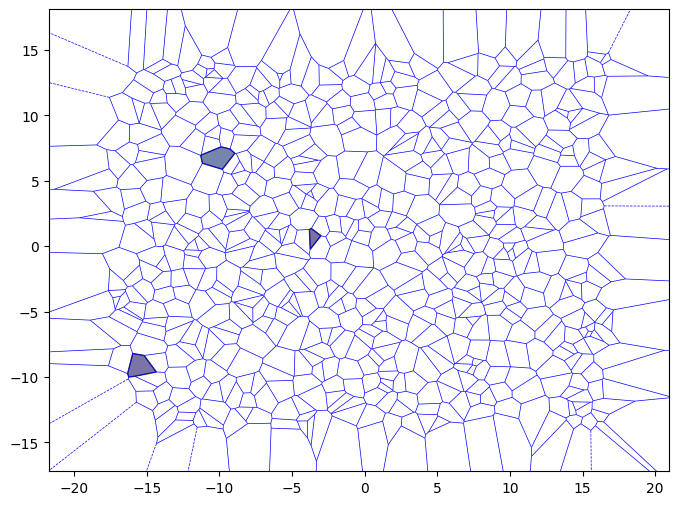

In [410]:
voronoi_plotter_random.hexatic_order(order, x_lim_min=x_min, x_lim_max=x_max, y_lim_min=y_min, y_lim_max=y_max)

In [174]:
r_values = np.linspace(1, 200, 150)  # Distances for K(r)
area = 200 * 200
k_results = voronoi_analyser.calculate_ripleys_k(r_values, area)

(11101,)
(4992, 4992)


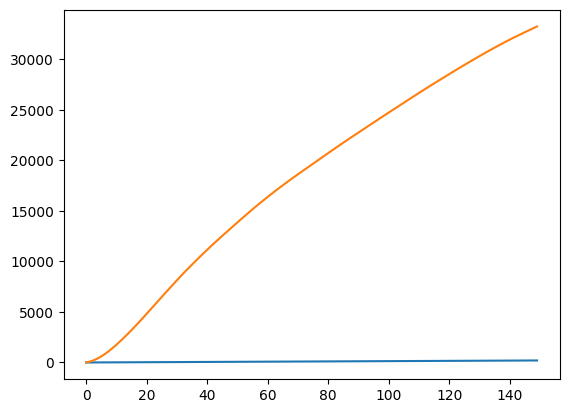

In [171]:
plt.plot(k_results)

In [163]:
k_results

,r,K(r)
0,1.0,2.909885
1,2.0,12.535384
2,3.0,27.354527
3,4.0,46.855975
4,5.0,70.574149
5,6.0,97.777763
6,7.0,128.547090
7,8.0,162.462304
8,9.0,199.088327
9,10.0,238.755080
